<h4> Background</h4>

In this project, I will be analyzing car accident data in order to predict what causes car collisions.
The problem of car collisions is a great one -- people are hurt and/or die. Every car accident is a sad occasion.
The stakeholders in solving this problem are, in essence, all of society. However, more precisly, this will
be targeted at government agents, who can make changes using the data findings that my findings present.
Solving this kind of problem is much less for business purposes and more for societal benefit. However, there
are clear business benefits--having to pay less for healthcare costs incurred after an accident or even replacing a worker
if needed.

<h4> Data</h4>

The dataset I will be using is called "Collisions--All Year" and it was provided by the Seattle Police Department
and recorded by Traffic Records. It includes all collisions from 2004 to Present. More importantly, it includes
very many different types of other data points about these collisions, including its location, what kind of collision it was,
its severity, what the weather was like, and more.
<p>I will use all of these different columns to try and predict the severity of the car accident. I will
use a multitude of different Machine Learning models, such as decision trees, SVMs, and more to try and predict severity
by training on this dataset.

c:\users\tal feldman\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
c:\users\tal feldman\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7011039019856576 {'max_depth': 4}
fitting
0.6975549619889049
0.7098828847339224
0.719899321964249
0.7200904094107977
0.7058098320234243
0.6972312117943186
0.696563415010017
0.7046283454050445
0.6819232547387887
0.6775055221657164

 0.7011089159235183


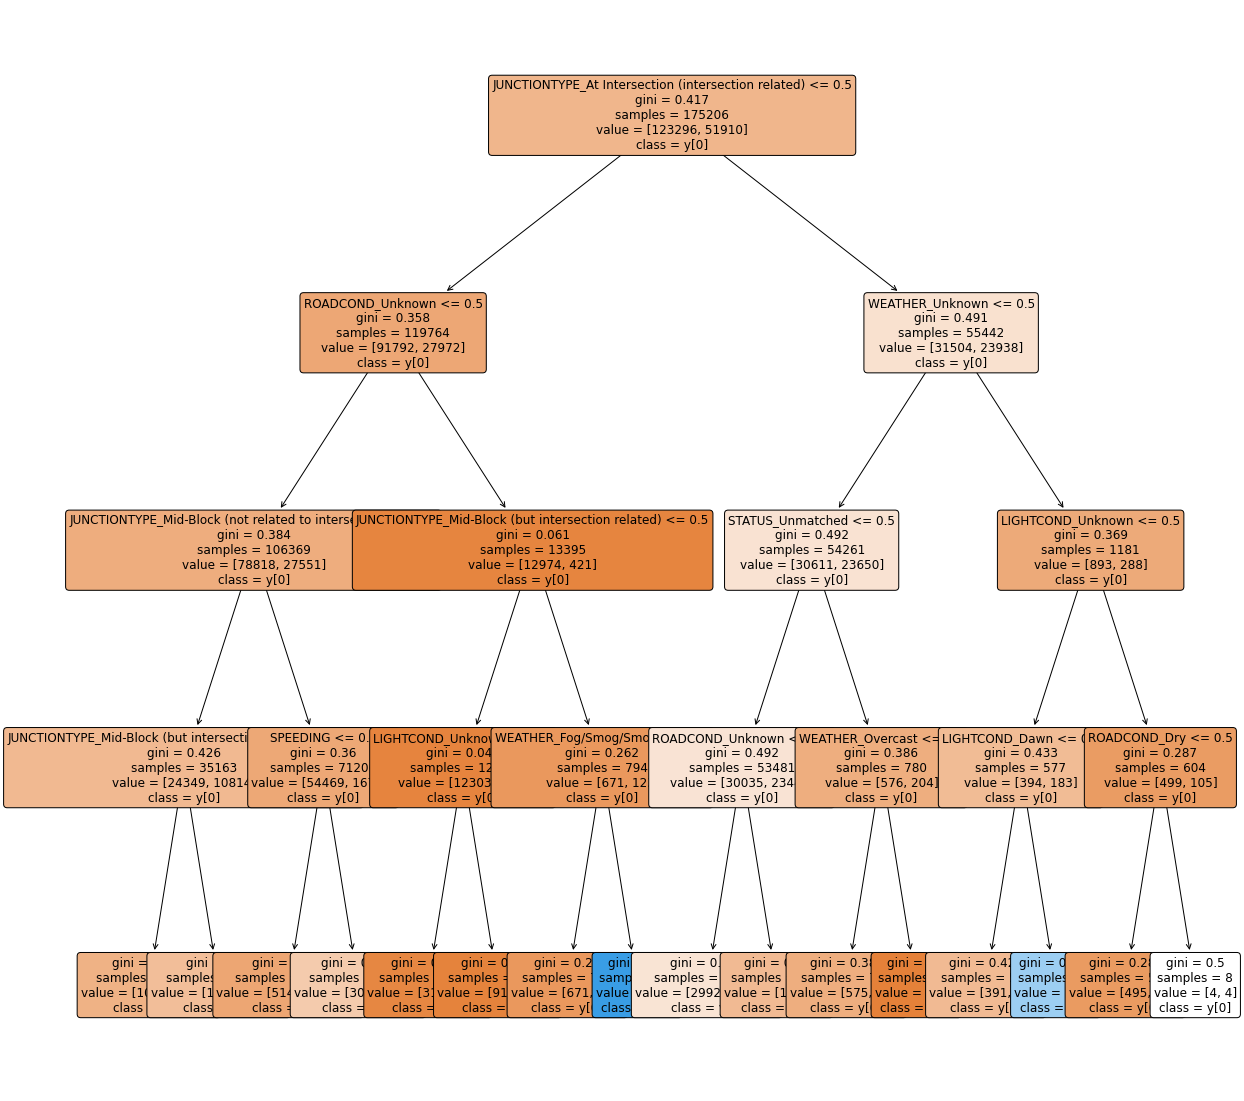

In [5]:
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data = pd.read_csv('Collisions.csv',sep=',')

data = data[['SEVERITYCODE', 'STATUS','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']]
data['SPEEDING'] = data['SPEEDING'] == 'Y'
data = pd.get_dummies(data, columns=['STATUS', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], drop_first=False)

X1 = data.iloc[:, data.columns != 'SEVERITYCODE']
Y1 = data.iloc[:, data.columns == 'SEVERITYCODE']

parameters = {'max_depth':range(2,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=74), parameters, n_jobs=4, cv = 10, return_train_score=True)

clf.fit(X=X1, y=Y1)
print(clf.best_score_, clf.best_params_)

tree_model = clf.best_estimator_
print('fitting')

scores = []
kfold = KFold(n_splits=10, random_state=6, shuffle=False)

for train_index, test_index in kfold.split(X1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train = Y1.iloc[train_index]
    y_test = Y1.iloc[test_index]
    tree_model.fit(X_train, y_train)
    print(tree_model.score(X_test, y_test))
    scores.append(tree_model.score(X_test, y_test))

print("\n" , np.mean(scores))

fig = plt.figure(figsize=[20,20])
plotter = tree.plot_tree(tree_model, feature_names= X1.columns.values.tolist(), class_names=True,filled=True,rounded=True,fontsize=12)
fig.savefig('decision_tree.png')

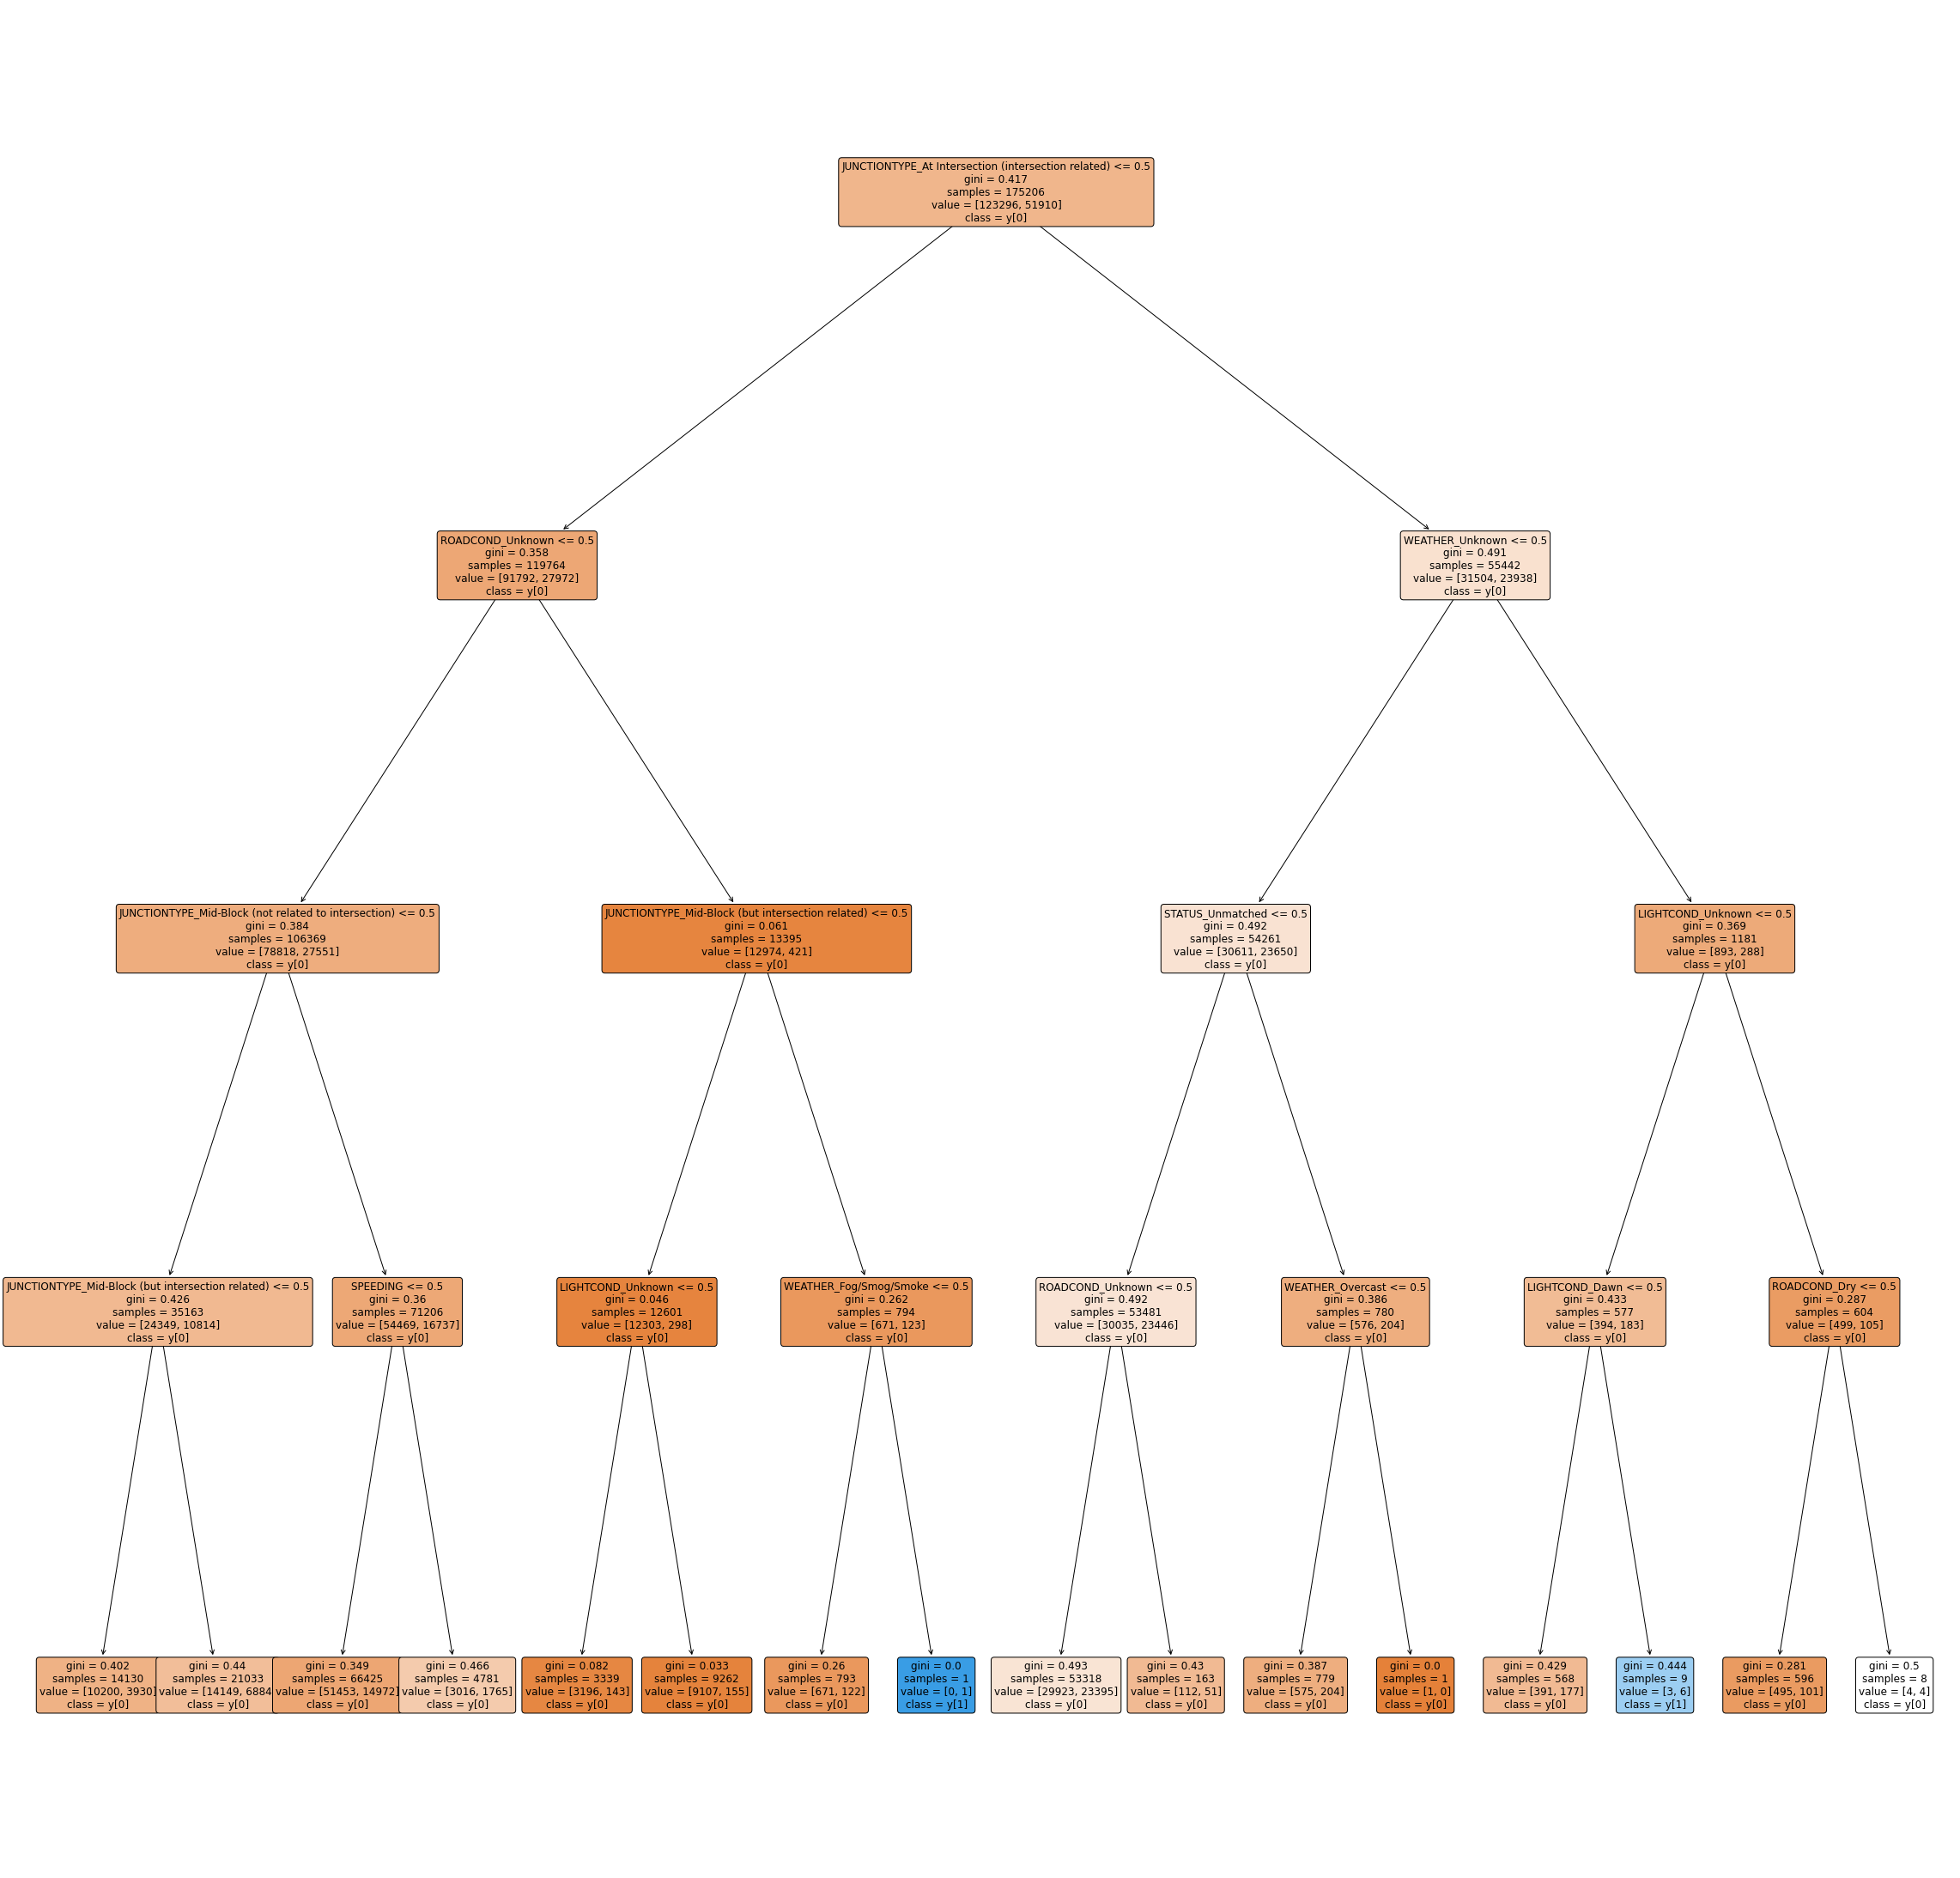

In [6]:
fig = plt.figure(figsize=[40,40])
plotter = tree.plot_tree(tree_model, feature_names= X1.columns.values.tolist(), class_names=True,filled=True,rounded=True,fontsize=12)
fig.savefig('decision_tree.png')


